In [1]:
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Nat_Gas.csv')
df.head()



,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


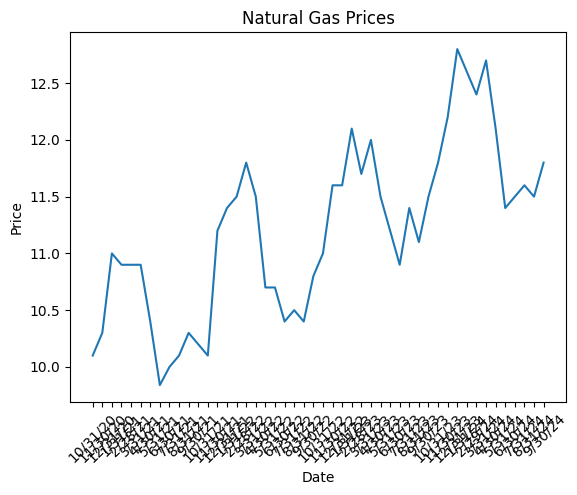

In [3]:
prices = df['Prices'].values
dates = df['Dates'].values


fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()


In [85]:
df=df.sort_values('Dates')
df.head()

,Dates,Prices
3,1/31/21,10.9
15,1/31/22,11.5
27,1/31/23,12.1
39,1/31/24,12.6
0,10/31/20,10.1


In [86]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['Date'] = df['Dates'].apply(lambda x: x.toordinal())


C:\Users\Sumit Singh\AppData\Local\Temp\ipykernel_20504\2454568687.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [87]:
X = df[['Date']]
y = df['Prices']
model = LinearRegression().fit(X, y)
df['Predicted_Prices'] = model.predict(X)

In [97]:
future_dates = pd.date_range(start=df['Dates'].max(), periods=365, freq='D')
future_dates_ordinal = future_dates.to_series().apply(lambda x: x.toordinal())
future_prices = model.predict(future_dates_ordinal.values.reshape(-1, 1))

c:\Users\Sumit Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


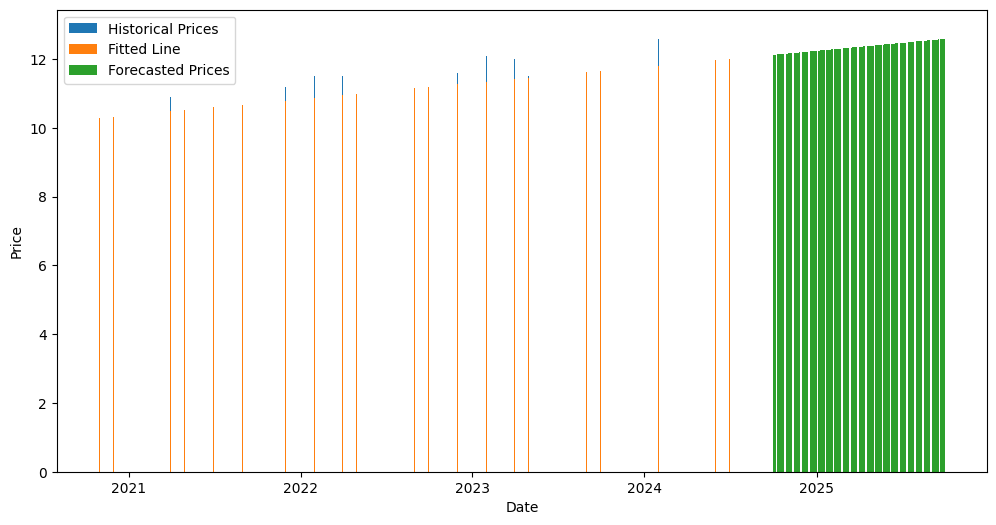

In [126]:

plt.figure(figsize=(12, 6))
plt.bar(df['Dates'], df['Prices'], label='Historical Prices')
plt.bar(df['Dates'], df['Predicted_Prices'], label='Fitted Line', linestyle='--')
plt.bar(future_dates, future_prices, label='Forecasted Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [115]:
def get_price(inuput_data):
    input_ordnal=pd.to_datetime(inuput_data).toordinal()

    price_pred=model.predict(np.array([[input_ordnal]]))[0]
    return price_pred


In [124]:
gas_predct_price=get_price('2030-09-01')
print(f'Predicted price : {gas_predct_price}')

Predicted price : 14.897327092699015


c:\Users\Sumit Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
